In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

In [2]:
from src.constants import CHR19_GSMF

In [3]:
CHR19_GSMF

array([[0, (-1.329253865093327, -2.1012983260077798, 10.791898285669884)],
       [1,
        (-1.3149341447529916, -2.2514233164176476, 10.785103784468431)],
       [2, (-1.3271467132736225, -2.586267691445359, 10.886122983082846)],
       [3, (-1.642690715555035, -3.4581139629268915, 11.130602583382139)],
       [4, (-1.9359672984742664, -4.265331116129381, 11.29402200678323)],
       [5, (-2.11937701834189, -4.793808457133812, 11.319153277347633)],
       [6, (-2.2453808792826506, -5.120104556124216, 11.327683096748732)],
       [7, (-2.0254858724623417, -4.086583954170053, 10.492783776919108)],
       [8, (-2.247950416921409, -5.37798038826539, 10.523484648440629)],
       [9, (-2.3781246473794218, -5.541306003681482, 10.541007523903234)]],
      dtype=object)

In [4]:
from src.sfh import MZR, SFMR
from src.utils import float_or_arr_input

In [5]:
print(SFMR.sfr.__annotations__)

{'logm': typing.Union[collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[typing.Union[bool, int, float, complex, str, bytes]]], 'return': typing.Union[collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[typing.Union[bool, int, float, complex, str, bytes]]]}


In [6]:
class Test:
    
    def test(self, x):
        return 2*x


t = Test()
t.test(1), t.test(1.), t.test([1]), t.test(np.array([1]))

(2, 2.0, [1, 1], array([2]))

In [7]:
class Test:
    
    @float_or_arr_input
    def test(self, x):
        return 2*x


t = Test()
t.test(1), t.test(1.), t.test([1]), t.test(np.array([1]))

(2, 2.0, array([2.]), array([2.]))

In [8]:
class Test:

    @float_or_arr_input
    def test(self, x):
        if x > 4:
            return 2*x
        else:
            return x

t = Test()
t.test(np.arange(0, 10, 1))

array([ 0.,  1.,  2.,  3.,  4., 10., 12., 14., 16., 18.])

In [9]:
def mzr_scatter_test_plot(ax, redshift, model, color):
    scatter = 'none'
    linestyle = '-'
    mzr = MZR(redshift=redshift, model=model, scatter_model=scatter)
    mzr.set_params()
    zohs = mzr.zoh(logms)
    ax.plot(logms, zohs, c=color, ls=linestyle, label=f'scatter {scatter}')
    
    linestyle='--'
    scatter = 'max'
    mzr = MZR(redshift=redshift, model=model, scatter_model=scatter)
    mzr.set_params()
    zohs = mzr.zoh(logms)
    ax.plot(logms, zohs, c=color, ls=linestyle, label=f'scatter {scatter}')
    
    scatter = 'min'
    mzr = MZR(redshift=redshift, model=model, scatter_model=scatter)
    mzr.set_params()
    zohs = mzr.zoh(logms)
    ax.plot(logms, zohs, c=color, ls=linestyle, label=f'scatter {scatter}')
    
    linestyle='.'
    scatter = 'normal'
    mzr = MZR(redshift=redshift, model=model, scatter_model=scatter)
    mzr.set_params()
    zohs = mzr.zoh(logms)
    ax.plot(logms, zohs, linestyle, c=color, label=f'scatter {scatter}')

Text(0.07, 0.5, '$12+\\log(\\mathrm{O}/\\mathrm{H})$')

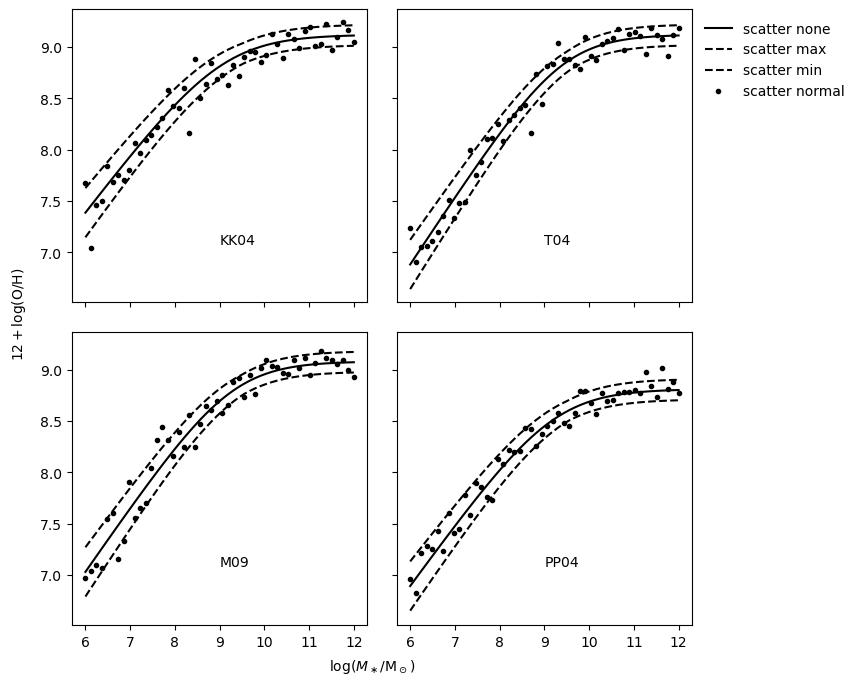

In [10]:
logms = np.linspace(6, 12, 50)
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

redshift = 0
model = 'KK04'
color = 'k'

models = ['KK04', 'T04', 'M09', 'PP04']
for ax, model in zip(axes.flatten(), models):
    mzr_scatter_test_plot(ax, redshift=redshift, model=model, color=color)
    ax.text(0.5, 0.2, model, transform=ax.transAxes)

axes[0, 1].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
fig.text(0.5, 0.07, r'$\log(M_\ast/\mathrm{M}_\odot)$', va='top', ha='center', transform=fig.transFigure)
fig.text(0.07, 0.5, r'$12+\log(\mathrm{O}/\mathrm{H})$', rotation=90, va='center', ha='right', transform=fig.transFigure)

In [11]:
def sfmr_scatter_test_plot(ax, redshift, flattening, color):
    scatter = 'none'
    linestyle = '-'
    sfmr = SFMR(redshift=redshift, flattening=flattening, scatter=scatter)
    sfrs = sfmr.sfr(logms)
    ax.plot(logms, sfrs, linestyle, c=color, label=f'scatter {scatter}')
    
    linestyle='--'
    scatter = 'max'
    sfmr = SFMR(redshift=redshift, flattening=flattening, scatter=scatter)
    sfrs = sfmr.sfr(logms)
    ax.plot(logms, sfrs, linestyle, c=color, label=f'scatter {scatter}')
    
    scatter = 'min'
    sfmr = SFMR(redshift=redshift, flattening=flattening, scatter=scatter)
    sfrs = sfmr.sfr(logms)
    ax.plot(logms, sfrs, linestyle, c=color, label=f'scatter {scatter}')
    
    linestyle='.'
    scatter = 'normal'
    sfmr = SFMR(redshift=redshift, flattening=flattening, scatter=scatter)
    sfrs = sfmr.sfr(logms)
    ax.plot(logms, sfrs, linestyle, c=color, label=f'scatter {scatter}')

Text(0.1, 0.5, '$\\log[\\mathrm{SFR}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})]$')

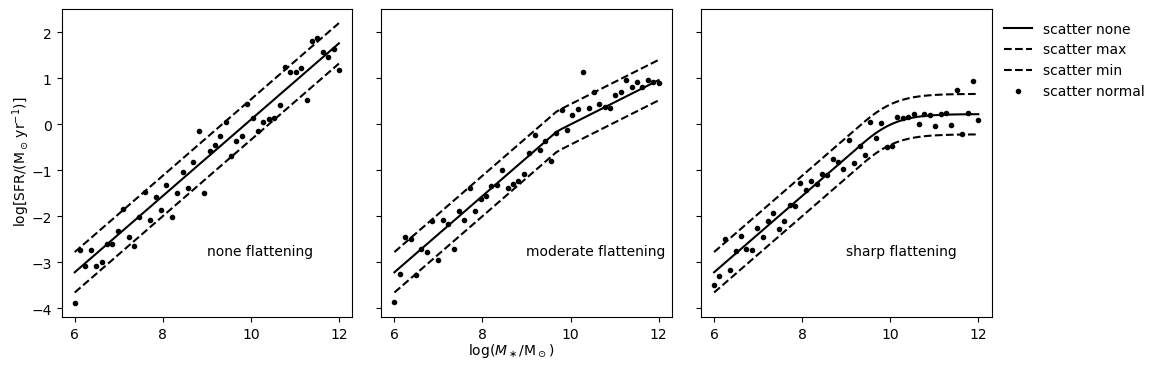

In [16]:
logms = np.linspace(6, 12, 50)
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

redshift = 0
color = 'k'

flattenings = ['none', 'moderate', 'sharp']
for ax, flattening in zip(axes.flatten(), flattenings):
    sfmr_scatter_test_plot(ax, redshift=redshift, flattening=flattening, color=color)
    ax.text(0.5, 0.2, f'{flattening} flattening', transform=ax.transAxes)

axes[2].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
fig.text(0.5, 0.05, r'$\log(M_\ast/\mathrm{M}_\odot)$', va='top', ha='center', transform=fig.transFigure)
fig.text(0.1, 0.5, r'$\log[\mathrm{SFR}/(\mathrm{M}_\odot\,\mathrm{yr}^{-1})]$', rotation=90, va='center', ha='right', transform=fig.transFigure)